In [0]:
import numpy as np

In [0]:
x = np.linspace(0,10,10)
x = np.random.rand(10)
x

array([0.46912734, 0.67649064, 0.4651394 , 0.72925164, 0.90389113,
       0.03322897, 0.39485727, 0.63676922, 0.61841715, 0.42042744])

In [0]:
def autocorr(x, t=1):
    return np.corrcoef(np.array([x[:-t], x[t:]]))
autocorr(x)


array([[ 1.        , -0.18580948],
       [-0.18580948,  1.        ]])

## Datasets with Descrptions

  1. Air Quality dataset [link](https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip)

  2. Date-Value pair dataset from [this](https://www.machinelearningplus.com/time-series/time-series-analysis-python/) tutorial [link]('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv)

  3. Indian Imports Dataset [link](https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv)



In [0]:
ser = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
ser.head(n=20)
#pd.unique(ser['city'])
abohar = ser.loc[ser.market == 'ABOHAR(PB)',:]
abohar
#abohar.head()
#abohar.size
mumbai = ser.loc[ser.market == 'MUMBAI',:]
mumbai

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008
...,...,...,...,...,...,...,...,...,...,...
6795,MUMBAI,December,2011,290350,519,994,749,MS,MUMBAI,December-2011
6796,MUMBAI,December,2012,218500,1048,1609,1330,MS,MUMBAI,December-2012
6797,MUMBAI,December,2013,226385,1298,1976,1639,MS,MUMBAI,December-2013
6798,MUMBAI,December,2014,294150,1433,2178,1802,MS,MUMBAI,December-2014


No handles with labels found to put in legend.


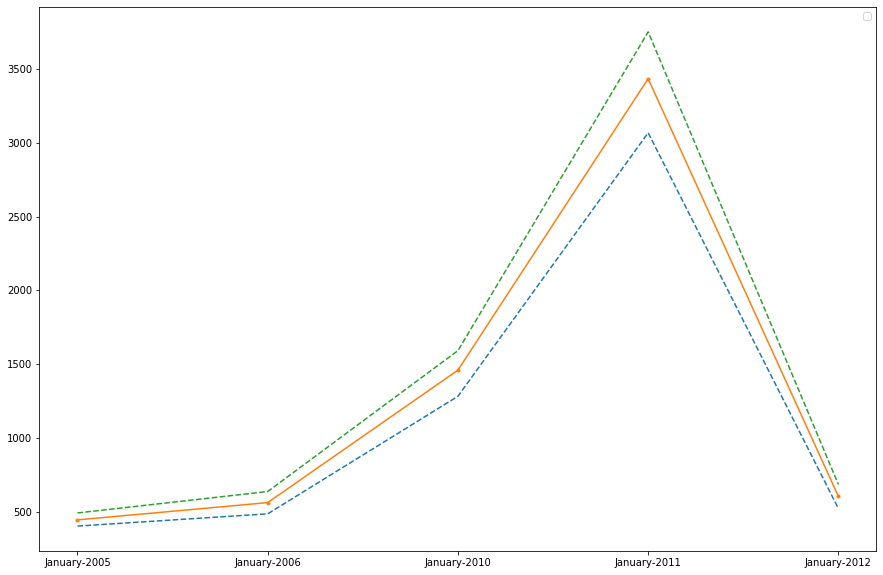

In [0]:
plt.figure(figsize=(15,10))
plt.plot(abohar['date'].head(),abohar['priceMin'].head(),'-',linestyle='dashed')
plt.plot(abohar['date'].head(),abohar['priceMod'].head(),'.-')
plt.plot(abohar['date'].head(),abohar['priceMax'].head(),'-',linestyle='dashed')
plt.legend()
plt.show()

In [0]:
plt.plot?

No handles with labels found to put in legend.


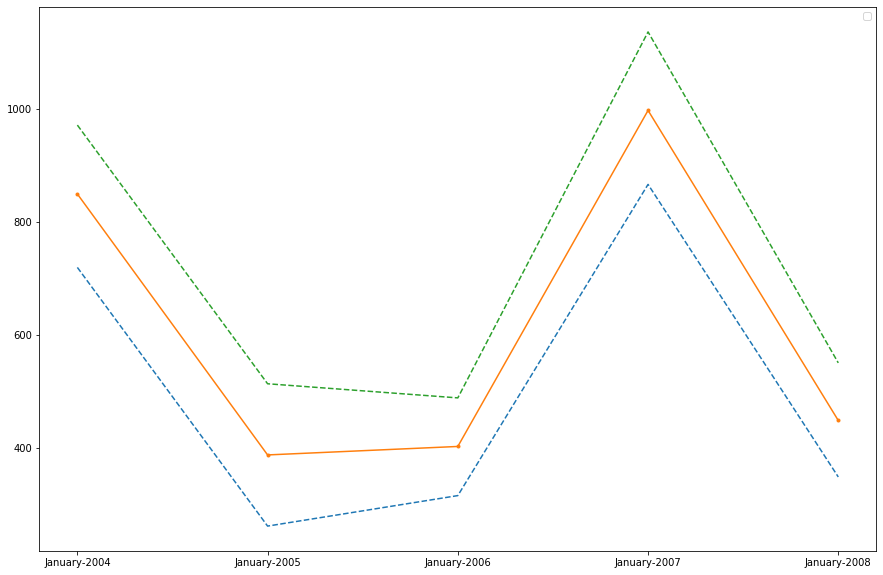

In [0]:
plt.figure(figsize=(15,10))
plt.plot(mumbai['date'].head(),mumbai['priceMin'].head(),'-',linestyle='dashed')
plt.plot(mumbai['date'].head(),mumbai['priceMod'].head(),'.-')
plt.plot(mumbai['date'].head(),mumbai['priceMax'].head(),'-',linestyle='dashed')
plt.legend()
plt.show()

## Resources
I found a python package that has several sample datasets for us to try on at : https://legacy.quiltdata.com/package/uciml/

https://otexts.com/fpp2/classical-decomposition.html

https://www.machinelearningplus.com/time-series/time-series-analysis-python/

https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

In [0]:
import numpy as np
import pandas as pd
import sklearn as skl
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1507k  100 1507k    0     0   243k      0  0:00:06  0:00:06 --:--:--  410k


In [0]:
!unzip -o AirQualityUCI.zip

Archive:  AirQualityUCI.zip
  inflating: AirQualityUCI.csv       
  inflating: AirQualityUCI.xlsx      


In [0]:
data = pd.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',', usecols=range(15), na_values=-200)
data = data.dropna(axis=0)
data.shape

(827, 15)

In [0]:
data.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,10/03/2004,23.00.00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,11/03/2004,00.00.00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,11/03/2004,01.00.00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,11/03/2004,02.00.00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
11,11/03/2004,05.00.00,0.7,1066.0,8.0,1.1,512.0,16.0,1918.0,28.0,1182.0,422.0,11.0,56.2,0.7366


In [0]:
data['Date'][:10]

0     10/03/2004
1     10/03/2004
2     10/03/2004
3     10/03/2004
4     10/03/2004
5     10/03/2004
6     11/03/2004
7     11/03/2004
8     11/03/2004
11    11/03/2004
Name: Date, dtype: object

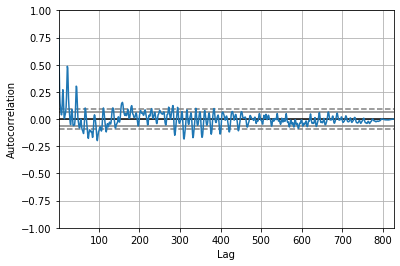

In [0]:
data["T"].autocorr(lag=20)
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data["NMHC(GT)"])
plt.show()

In [0]:
!pip install PyPR


     |████████████████████████████████| 768kB 2.8MB/s 
  Created wheel for PyPR: filename=PyPR-0.1.1-cp36-none-any.whl size=40928 sha256=3e1aa4c705f7827c1cd4a5de00bb0584c9e986cc219d918b28f331e4fb3f07d1
  Stored in directory: /root/.cache/pip/wheels/d6/79/29/594740a1dbf557726d29c2712b57bd7f503f666f1362610cf4
Successfully built PyPR


In [0]:
x = np.random.randn(100)
statsmodels.stats.diagnostic.acorr_ljungbox(x,lags=20)
#acorr_ljungbox(x, lags=20)  #lags is the largest lag to report


(array([ 0.09436756,  0.9604887 ,  1.3949508 ,  1.48955525,  4.4593632 ,
         4.51367772,  5.70594266,  5.80605314,  5.80610912,  6.32127748,
         6.91363329,  8.01457828,  9.60173931,  9.67797885,  9.69893621,
        11.40480551, 11.67505551, 12.02792199, 12.36634954, 16.99791096]),
 array([0.75869644, 0.61863221, 0.70671872, 0.82849   , 0.48533885,
        0.60751541, 0.57447332, 0.66894646, 0.75915596, 0.78758738,
        0.80603389, 0.78399011, 0.72613193, 0.78532764, 0.83823819,
        0.78383665, 0.81940195, 0.84579256, 0.86937453, 0.6531093 ]))

In [0]:
import numpy as np
import statsmodels
import statsmodels.api as sm
from statsmodels import stats

N = 10000
T = 100

x = np.random.normal(0, 1, T)
_, pvalues = statsmodels.stats.diagnostic.acorr_ljungbox(x)
ret = np.zeros(shape=pvalues.shape)

for i in range(N):
    x = np.random.normal(0,1,T)
    _, pvalues = statsmodels.stats.diagnostic.acorr_ljungbox(x)
    ret += (pvalues<0.05).astype(int)

ret /= N
print(ret)

[0.052  0.0517 0.0519 0.0531 0.0547 0.0557 0.0552 0.0547 0.0577 0.0597
 0.0616 0.0629 0.066  0.0661 0.0683 0.0673 0.071  0.073  0.0727 0.0732
 0.0732 0.0754 0.0769 0.0782 0.079  0.0794 0.0792 0.0814 0.0833 0.0848
 0.0851 0.0857 0.0867 0.0879 0.0889 0.0882 0.0896 0.092  0.0923 0.0912]


In [0]:
from statsmodels.stats.diagnostic import acorr_ljungbox

from pypr.stattest.ljungbox import *
import scipy.stats


x = np.random.randn(100)
#rg = genfromtxt('sunspots/sp.dat')
#x = rg[:,1] # Just use number of sun spots, ignore year
h = 20 # Number of lags
lags = range(h)
sa = np.zeros((h))
for k in range(len(lags)):
    sa[k] = sac(x, k)
figure()
markerline, stemlines, baseline = stem(lags, sa)
grid()
title('Sample Autocorrealtion Function (ACF)')
ylabel('Sample Autocorrelation')
xlabel('Lag')
h, pV, Q, cV = lbqtest(x, range(1, 20), alpha=0.1)
print( 'lag   p-value          Q    c-value   rejectH0')
for i in range(len(h)):
    print("%-2d %10.3f %10.3f %10.3f      %s" % (i+1, pV[i], Q[i], cV[i], str(h[i])))

ModuleNotFoundError: ignored

In [0]:
ser = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
ser.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
df = df.loc[df.market=='MUMBAI', :]
df.head()


,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


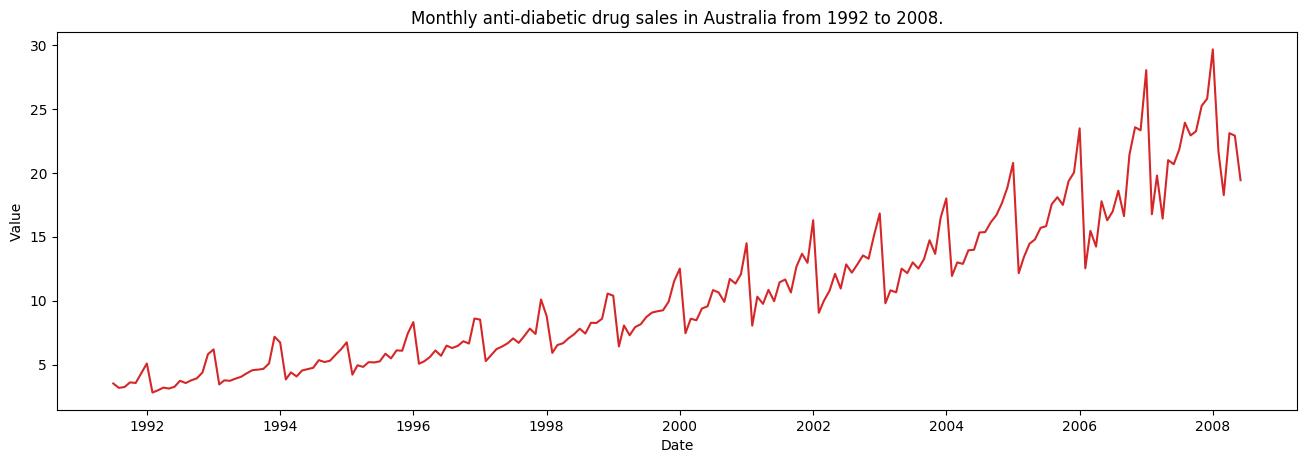

In [0]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')    

## Seasonal Data


In [0]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)


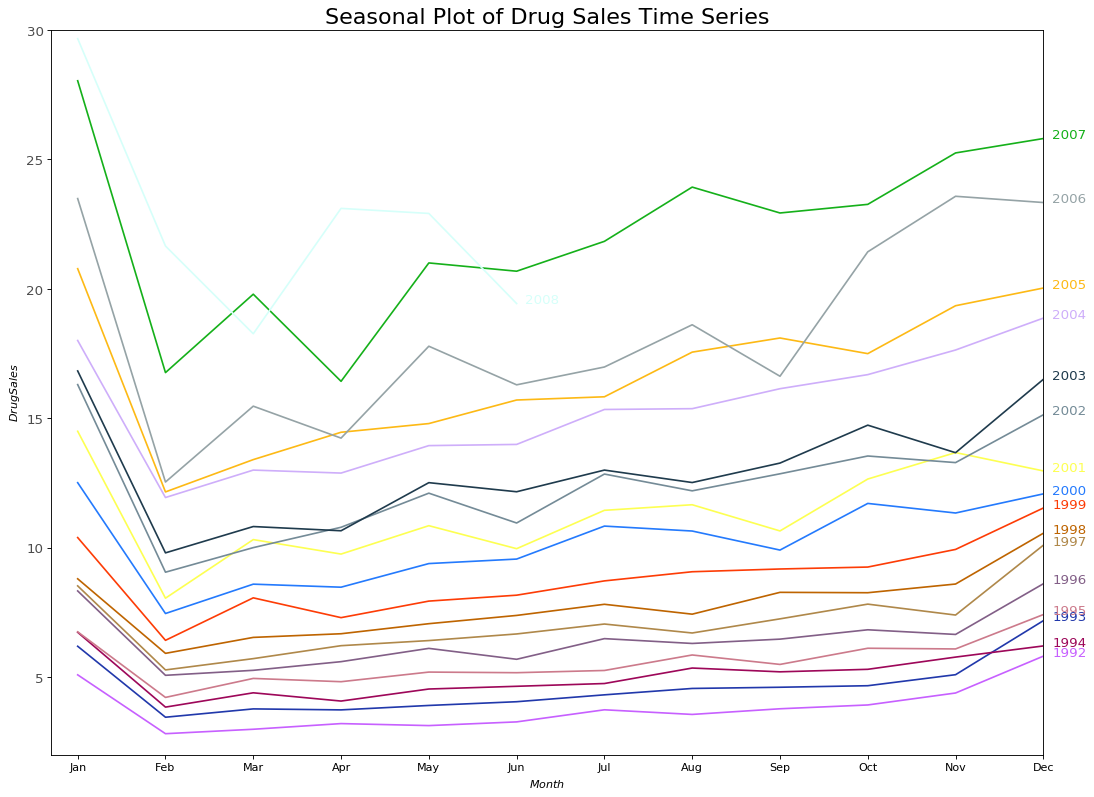

In [0]:
# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

In [0]:
df


,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov
...,...,...,...,...
199,2008-02-01,21.654285,2008,Feb
200,2008-03-01,18.264945,2008,Mar
201,2008-04-01,23.107677,2008,Apr
202,2008-05-01,22.912510,2008,May


In [0]:
df[['value','year','month']]

,value,year,month
0,3.526591,1991,Jul
1,3.180891,1991,Aug
2,3.252221,1991,Sep
3,3.611003,1991,Oct
4,3.565869,1991,Nov
...,...,...,...
199,21.654285,2008,Feb
200,18.264945,2008,Mar
201,23.107677,2008,Apr
202,22.912510,2008,May


## Grouping Time-series data

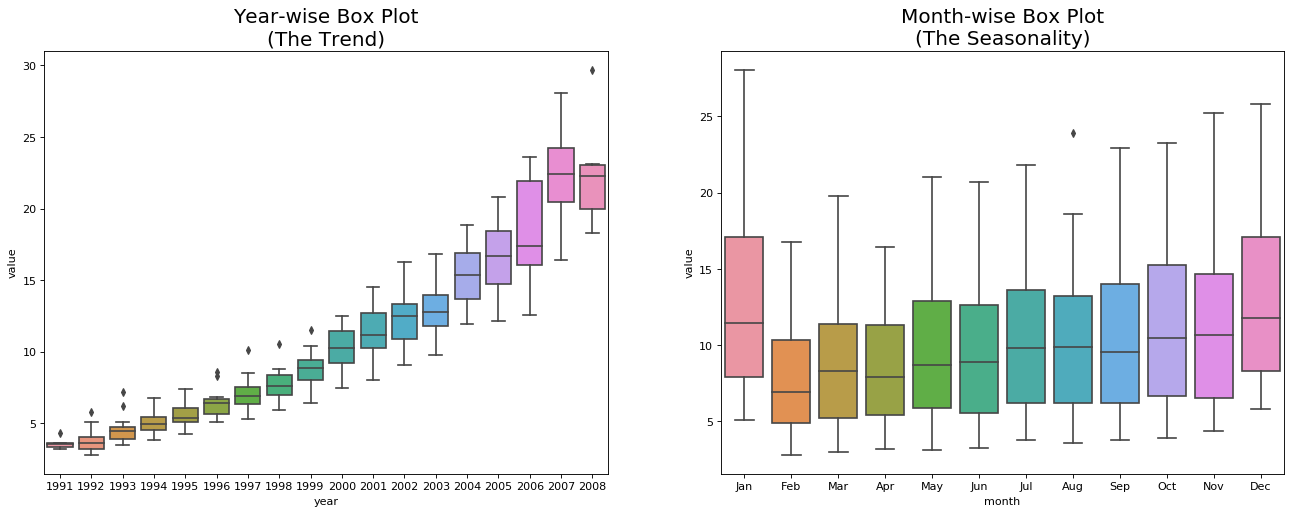

In [0]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

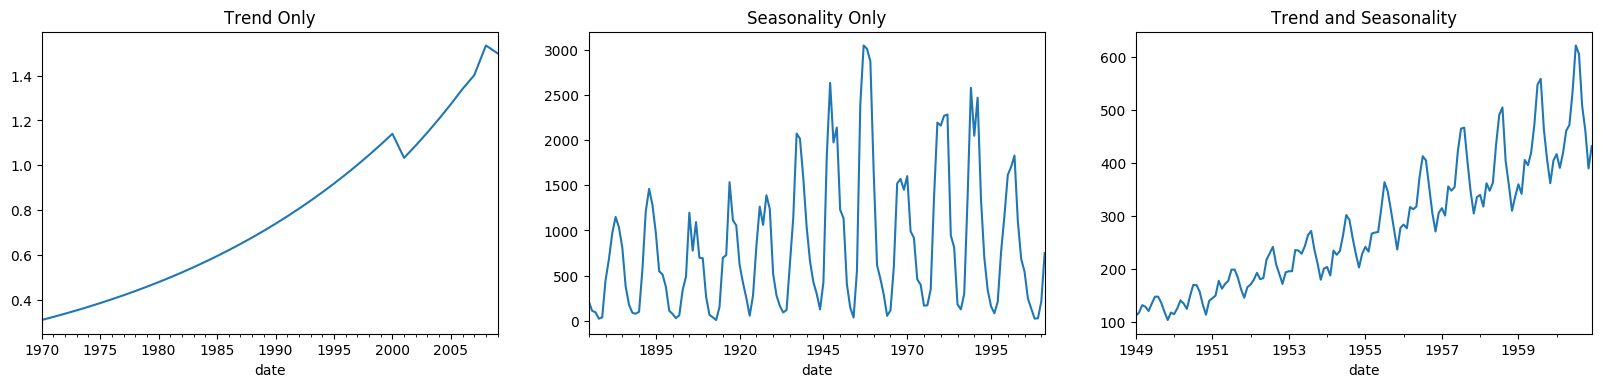

In [0]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])

## Breaking down a time-series

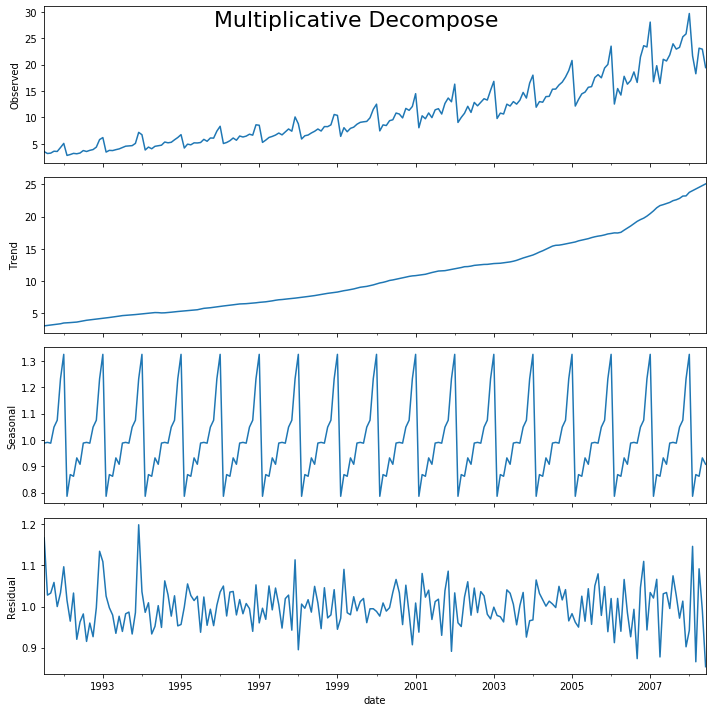

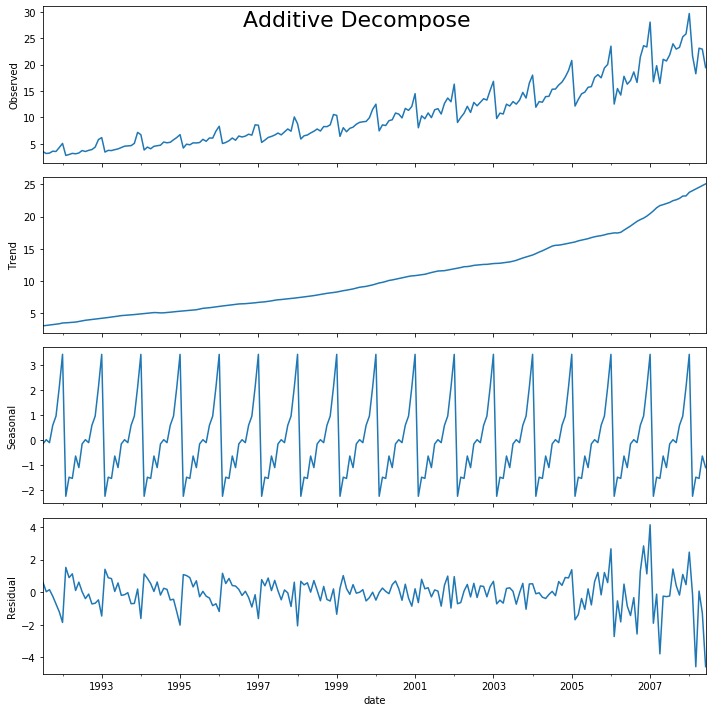

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

Setting extrapolate_trend='freq' takes care of any missing values in the trend and residuals at the beginning of the series.

In [0]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed,result_mul.seasonal*result_mul.trend*result_mul.resid], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values','product']
df_reconstructed.head()

,seas,trend,resid,actual_values,product
date,,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869,3.565869


In [0]:
df.shape

(204, 1)

In [0]:
result_add

In [0]:
#Non temporal list of machines
!curl -O https://cs.colostate.edu/~info/machines

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80283  100 80283    0     0  44208      0  0:00:01  0:00:01 --:--:-- 44184


In [0]:
#Panel style dataset of electricity consumption of a single household over 4 years

!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
!unzip -o household_power_consumption.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.6M  100 19.6M    0     0  8021k      0  0:00:02  0:00:02 --:--:-- 8017k
Archive:  household_power_consumption.zip
  inflating: household_power_consumption.txt  


In [0]:
import glob
glob.glob('household*')

['household_power_consumption.zip', 'household_power_consumption.txt']

In [0]:
import pandas as pd


In [0]:
!head household_power_consumption.txt

Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
16/12/2006;17:24:00;4.216;0.418;234.840;18.400;0.000;1.000;17.000
16/12/2006;17:25:00;5.360;0.436;233.630;23.000;0.000;1.000;16.000
16/12/2006;17:26:00;5.374;0.498;233.290;23.000;0.000;2.000;17.000
16/12/2006;17:27:00;5.388;0.502;233.740;23.000;0.000;1.000;17.000
16/12/2006;17:28:00;3.666;0.528;235.680;15.800;0.000;1.000;17.000
16/12/2006;17:29:00;3.520;0.522;235.020;15.000;0.000;2.000;17.000
16/12/2006;17:30:00;3.702;0.520;235.090;15.800;0.000;1.000;17.000
16/12/2006;17:31:00;3.700;0.520;235.220;15.800;0.000;1.000;17.000
16/12/2006;17:32:00;3.668;0.510;233.990;15.800;0.000;1.000;17.000


In [0]:
df = pd.read_csv('household_power_consumption.txt',sep=';',low_memory=False,header=0,infer_datetime_format=True,parse_dates={'datetime':[0,1]},index_col=['datetime'])

In [0]:
df.keys()

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [0]:
df.size

14526813

In [0]:
import statsmodels.api as sm

In [0]:
list(dir(sm.tsa)).find('ARIMA')

AttributeError: ignored

In [0]:
x = ['SarimaXXX','b','c']

In [0]:
import re


In [0]:
for i in x:
  tf = re.match(r"^.*[ARIMA].*",i.upper())
  if(tf):
    print(tf.string)

SARIMAXXX


### Statsmodels - a quick start

In [0]:
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices #lbrary for describing stat models and building design matrices using r like formulas
import matplotlib.pyplot as plt

In [0]:
df = sm.datasets.grunfeld

In [0]:
df = df.load_pandas()

In [0]:
df

<class 'statsmodels.datasets.utils.Dataset'>

In [0]:
df.keys()

dict_keys(['data', 'names', 'endog', 'exog', 'endog_name', 'exog_name', 'raw_data'])

In [0]:
df.data

,invest,value,capital,firm,year
0,317.600,3078.500,2.800,General Motors,1935.0
1,391.800,4661.700,52.600,General Motors,1936.0
2,410.600,5387.100,156.900,General Motors,1937.0
3,257.700,2792.200,209.200,General Motors,1938.0
4,330.800,4313.200,203.400,General Motors,1939.0
...,...,...,...,...,...
215,4.770,36.494,75.847,American Steel,1950.0
216,6.532,46.082,77.367,American Steel,1951.0
217,7.329,57.616,78.631,American Steel,1952.0
218,9.020,57.441,80.215,American Steel,1953.0


In [0]:
labels = list(df.data.keys())

In [0]:
labels

['invest', 'value', 'capital', 'firm', 'year']

In [0]:
df.data[-5:]

,invest,value,capital,firm,year
215,4.770,36.494,75.847,American Steel,1950.0
216,6.532,46.082,77.367,American Steel,1951.0
217,7.329,57.616,78.631,American Steel,1952.0
218,9.020,57.441,80.215,American Steel,1953.0
219,6.281,47.165,83.788,American Steel,1954.0


In [0]:
data = df.data

In [0]:
data = data.dropna()

In [0]:
GM = data.loc[data['firm']=='General Motors']
GM.dropna(axis=1)
GM[:20]

,invest,value,capital,firm,year
0,317.6,3078.5,2.8,General Motors,1935.0
1,391.8,4661.7,52.6,General Motors,1936.0
2,410.6,5387.1,156.9,General Motors,1937.0
3,257.7,2792.2,209.2,General Motors,1938.0
4,330.8,4313.2,203.4,General Motors,1939.0
5,461.2,4643.9,207.2,General Motors,1940.0
6,512.0,4551.2,255.2,General Motors,1941.0
7,448.0,3244.1,303.7,General Motors,1942.0
8,499.6,4053.7,264.1,General Motors,1943.0
9,547.5,4379.3,201.6,General Motors,1944.0


Text(0, 0.5, 'invest')

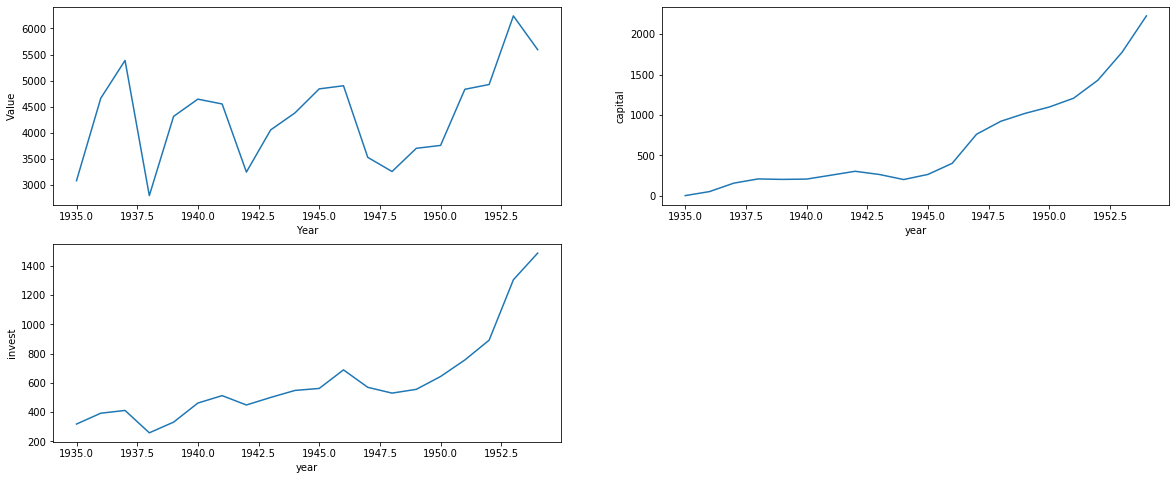

In [0]:
fig = plt.figure(figsize=(20, 8))
fig.add_subplot(2,2,1)
plt.plot(GM['year'],GM['value'])
plt.xlabel('Year')
plt.ylabel('Value')
fig.add_subplot(2,2,2)
plt.plot(GM['year'],GM['capital'])
plt.xlabel('year')
plt.ylabel('capital')
fig.add_subplot(2,2,3)
plt.plot(GM['year'],GM['invest'])
plt.xlabel('year')
plt.ylabel('invest')

No handles with labels found to put in legend.


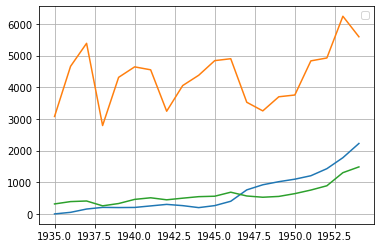

In [0]:
fig, axs = plt.subplots(1, 1)
fig.figsize = (20,20)
axs.plot(GM['year'], GM['capital'], GM['year'], GM['value'],GM['year'],GM['invest'])
axs.grid(True)
axs.legend()

In [0]:
pd.unique(data['firm'])

array(['General Motors', 'US Steel', 'General Electric', 'Chrysler',
       'Atlantic Refining', 'IBM', 'Union Oil', 'Westinghouse',
       'Goodyear', 'Diamond Match', 'American Steel'], dtype=object)

In [0]:
IBM = data.loc[data['firm'] == 'IBM']

In [0]:
IBM

,invest,value,capital,firm,year
100,20.36,197.0,6.5,IBM,1935.0
101,25.98,210.3,15.8,IBM,1936.0
102,25.94,223.1,27.7,IBM,1937.0
103,27.53,216.7,39.2,IBM,1938.0
104,24.60,286.4,48.6,IBM,1939.0
105,28.54,298.0,52.5,IBM,1940.0
106,43.41,276.9,61.5,IBM,1941.0
107,42.81,272.6,80.5,IBM,1942.0
108,27.84,287.4,94.4,IBM,1943.0
109,32.60,330.3,92.6,IBM,1944.0


No handles with labels found to put in legend.


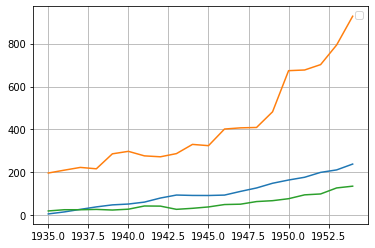

In [0]:
fig, axs = plt.subplots(1, 1)
fig.figsize = (20,20)
axs.plot(IBM['year'], IBM['capital'], IBM['year'],IBM['value'],IBM['year'],IBM['invest'])
axs.grid(True)
axs.legend()

In [0]:
sm.tsa.acf(IBM['value'],nlags=10),sm.tsa.acf(IBM['invest'],nlags=10),sm.tsa.acf(IBM['capital'],nlags=10)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


(array([ 1.        ,  0.78201994,  0.60978983,  0.47980414,  0.33108732,
         0.14763524,  0.06101124, -0.0030958 , -0.08574394, -0.17163551,
        -0.2043457 ]),
 array([ 1.        ,  0.78850212,  0.57991626,  0.44171702,  0.29291153,
         0.17572074,  0.06545861, -0.02263714, -0.08584255, -0.17299282,
        -0.2259527 ]),
 array([ 1.        ,  0.81745081,  0.65433038,  0.49315706,  0.3577084 ,
         0.22967556,  0.10443105,  0.00336292, -0.06774092, -0.10671649,
        -0.15774082]))

In [0]:
sm.tsa.pacf(IBM['value'],nlags=10),sm.tsa.pacf(IBM['invest'],nlags=10),sm.tsa.pacf(IBM['capital'],nlags=10)

(array([ 1.00000000e+00,  8.23178885e-01, -2.45721729e-04,  2.10950675e-02,
        -1.74880570e-01, -3.25442091e-01,  1.30731756e-01, -2.30279494e-02,
        -1.75133373e-01, -2.99095956e-01, -1.30383185e-01]),
 array([ 1.        ,  0.83000224, -0.14321068,  0.0890279 , -0.20100749,
         0.00925247, -0.19198334, -0.02955822, -0.11971791, -0.32686315,
        -0.07473411]),
 array([ 1.        ,  0.86047454, -0.05155443, -0.12862473, -0.04102084,
        -0.11864658, -0.17789044, -0.08219589, -0.0305059 ,  0.01218038,
        -0.27665515]))

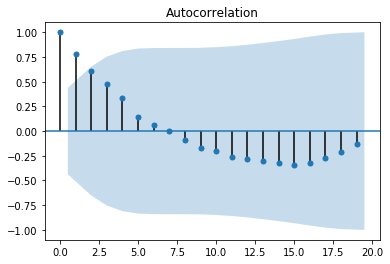

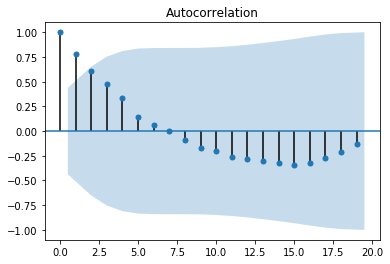

In [0]:
sm.graphics.tsa.plot_acf(IBM['value'],lags=19)

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


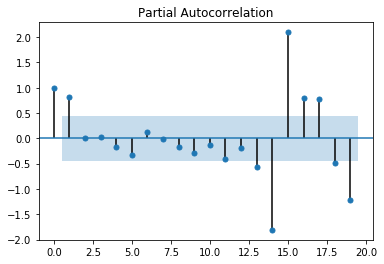

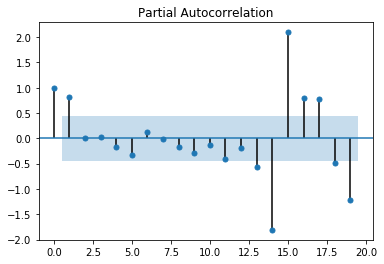

In [0]:
sm.graphics.tsa.plot_pacf(IBM['value'],lags=19)